In [28]:
import pandas as pd
import numpy as np
import fuzzy

## The data set

The first step is to read the data set. The data set can be found here:

https://www.kaggle.com/rowhitswami/nips-papers-1987-2019-updated

This data does not contain any details of the authors gender. We will therefore "predict" the gender of the authors using fuzzy.

In [22]:
author_df = pd.read_csv('~/Documents/coursedata/authors.csv')

In [23]:
author_df.head()

,source_id,first_name,last_name,institution
0,27,Alan,Murray,NaN
1,27,Anthony,Smith,NaN
2,27,Zoe,Butler,NaN
3,63,Yaser,Abu-Mostafa,NaN
4,60,Michael,Fleisher,NaN


In [ ]:
np.shape(author_df)

In [26]:
#convert author names to string

author_df['first_name'] = author_df['first_name'].astype(str)

In [60]:
#remove duplicates
author_df = author_df.drop_duplicates(['first_name', 'last_name'])

## Bring on the phonics

We will now create a new column or list that contains the phonetic equivalent of every first name that we just extracted.

In [41]:
# Looping through author's first names to create the nysiis (fuzzy) equivalent
nysiis_name = []
# ...YOUR CODE FOR TASK 3...
for name in author_df['first_name']:
    nysiis_name.append(fuzzy.nysiis(name))
    
# Adding nysiis_name as a column to author_df
author_df['nysiis_name'] = nysiis_name

# Printing out the difference between unique firstnames and unique nysiis_names:
len(np.unique(author_df['first_name'])) - len(np.unique(author_df['nysiis_name']))

3104

In [42]:
duplicates = author_df.duplicated('nysiis_name', keep = False)
duplicated_post = author_df[duplicates].sort_values(by = 'nysiis_name')

In [43]:
duplicated_post

,source_id,first_name,last_name,institution,nysiis_name
291,179,S.,Haghighi,NaN,
1084,586,S.,Pickard,NaN,
94,86,A.,Horst,NaN,
3986,1767,S.,Sundararajan,NaN,
3987,1767,S.,Keerthi,NaN,
...,...,...,...,...,...
27822,936,Ziyan,Wu,United Imaging Intelligence,ZYAN
24939,5661,Ziyin,Liu,University of Tokyo,ZYAN
23034,2453,Ziyan,Wang,Carnegie Mellon University,ZYAN
27770,147,Ziyuan,Zhong,Columbia University,ZYAN


We can see that the last couple of names are all pronounced the same.

In [45]:
babies_df = pd.read_csv('~/Documents/coursedata/babynames_nysiis.csv', delimiter = ';')

In [46]:
# Looping through babies_df to and filling up gender

babies_df.loc[babies_df['perc_female'] > babies_df['perc_male'], 'gender' ] = 'F'
babies_df.loc[babies_df['perc_male'] > babies_df['perc_female'], 'gender' ] = 'M'
babies_df.loc[babies_df['perc_male'] == babies_df['perc_female'], 'gender' ] = 'N'

## Matching

Now that we have identified the likely genders of different names, let's find author genders by searching for each author's name in the babies_df DataFrame, and extracting the associated gender.

In [47]:
author_df = pd.merge(author_df, babies_df.rename(columns={'babynysiis': 'nysiis_name'}), 
                     how="left", on= 'nysiis_name')
author_df.loc[author_df['gender'].isnull(), 'gender'] = 'Unknown'

In [48]:
author_df = author_df.rename(columns ={'gender':'author_gender'})

In [49]:
author_df['author_gender'].value_counts()

F          5975
M          5641
Unknown    1860
N           563
Name: author_gender, dtype: int64

In [50]:
author_df

,source_id,first_name,last_name,institution,nysiis_name,perc_female,perc_male,author_gender
0,27,Alan,Murray,NaN,ALAN,85.20,14.80,F
1,27,Anthony,Smith,NaN,ANTANY,36.36,63.64,M
2,27,Zoe,Butler,NaN,Z,64.00,36.00,F
3,63,Yaser,Abu-Mostafa,NaN,YASAR,48.15,51.85,M
4,60,Michael,Fleisher,NaN,MACAL,62.14,37.86,F
...,...,...,...,...,...,...,...,...
14034,4799,Yaxian,Xia,Peking University,YAXAN,66.67,33.33,F
14035,1827,Niklas Oskar,Hjuler,University of Copenhagen,NACLASASCAR,NaN,NaN,Unknown
14036,1827,David,Saulpic,Ecole normale supérieure,DAVAD,20.00,80.00,M
14037,8693,Erik,Vee,Google,ERAC,55.10,44.90,F


Looking at the data you will see that the model is not perfect.

In [57]:
# Looping through years to find the number of male, female and unknown authors per year
groups = author_df.groupby('author_gender').size().reset_index(name='counts')

In [58]:
groups.head()

,author_gender,counts
0,F,5975
1,M,5641
2,N,563
3,Unknown,1860


In [53]:
# Importing matplotlib
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

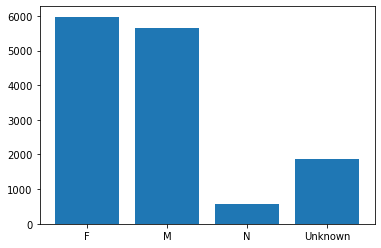

In [59]:
plt.bar(groups['author_gender'], groups['counts'])